### What are the most demanded skills for the top 3 most popular data roles?

#### Methodology
>  ##### Clean up skill column
>  ##### Calculate skill count based on job_title_short
>  ##### Calculate skill percentage
>  ##### Plot final findings

In [1]:
# Importing Libraries

import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data CleanUp
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Filter the data for the jobs in the United States

df_US = df[df['job_country'] == 'United States']

df_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [3]:
# Explode the job skills column

df_skills = df_US.explode('job_skills')

df_skills[['job_skills', 'job_title_short']]

,job_skills,job_title_short
0,None,Senior Data Engineer
3,python,Data Engineer
3,c++,Data Engineer
3,java,Data Engineer
3,matlab,Data Engineer
...,...,...
785692,r,Data Scientist
785703,None,Data Analyst
785705,sql,Data Analyst
785705,python,Data Analyst


In [4]:
df_skills = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [5]:
df_skills_count = df_skills.reset_index(name = 'skills_count')

df_skills_count = df_skills_count.sort_values(by = 'skills_count', ascending = False)

df_skills_count

,job_skills,job_title_short,skills_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [6]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

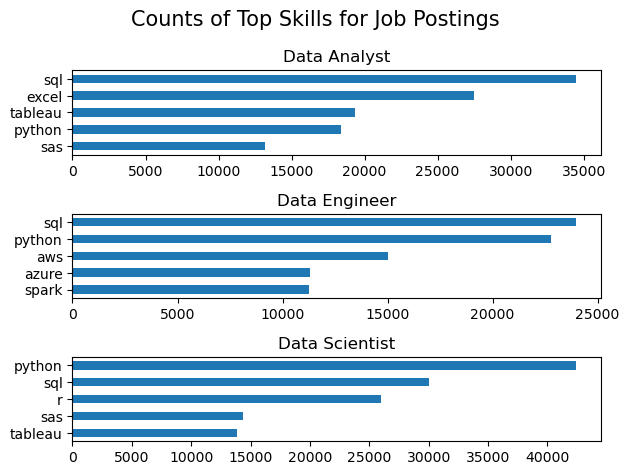

In [7]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind = 'barh', x = 'job_skills', y = 'skills_count', ax = ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills for Job Postings', fontsize = 15)
fig.tight_layout()
plt.show()

In [8]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name = 'job_total')

df_job_title_count

,job_title_short,job_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [9]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how = 'left', on = 'job_title_short')

df_skills_perc['skills_percent'] = df_skills_perc['skills_count'] / df_skills_perc['job_total']

df_skills_perc

,job_skills,job_title_short,skills_count,job_total,skills_percent
0,python,Data Scientist,42379,58830,0.720364
1,sql,Data Analyst,34452,67816,0.508022
2,sql,Data Scientist,30034,58830,0.510522
3,excel,Data Analyst,27519,67816,0.405789
4,r,Data Scientist,26022,58830,0.442325
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.000551
1866,vb.net,Senior Data Scientist,1,12946,0.000077
1867,fortran,Machine Learning Engineer,1,921,0.001086
1868,planner,Cloud Engineer,1,423,0.002364


In [10]:
df_skills_perc['skills_percent'] = 100 * df_skills_perc['skills_count'] / df_skills_perc['job_total']

df_skills_perc

,job_skills,job_title_short,skills_count,job_total,skills_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


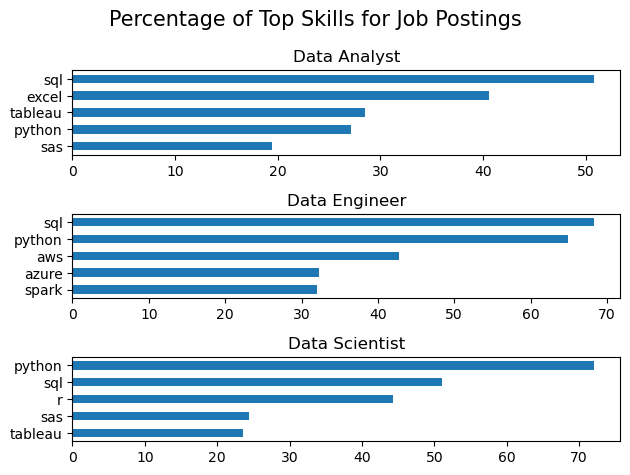

In [11]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    df_plot.plot(kind = 'barh', x = 'job_skills', y = 'skills_percent', ax = ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Percentage of Top Skills for Job Postings', fontsize = 15)
fig.tight_layout()
plt.show()

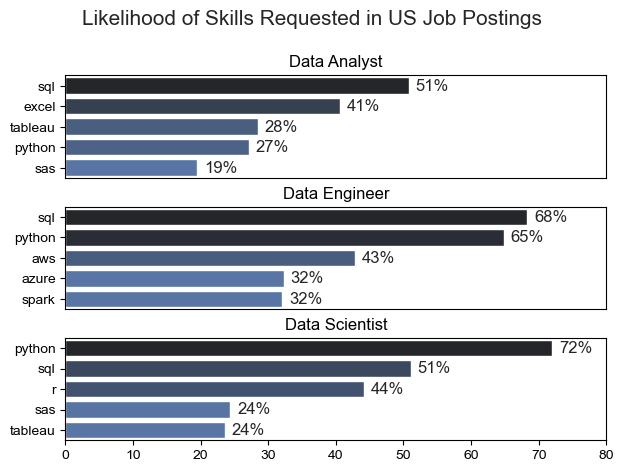

In [12]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style = 'ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data = df_plot, x = 'skills_percent', y = 'job_skills',  ax = ax[i], hue = 'skills_count', 
                            palette = 'dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 80)

    for n, v in enumerate(df_plot['skills_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va = 'center')

    if i != len(job_titles) - 1 :
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize = 15)
fig.tight_layout(h_pad = 0.5)
plt.show()